In [1]:
import pandas as pd
from rdkit import Chem,rdBase
from rdkit.Chem import PandasTools
import sqlite3

In [2]:
con = sqlite3.connect("/home/oriol/dev/mmpdb/tests2/test_data.mmpdb")
#con = sqlite3.connect("/home/oriol/dev/mmpdb/drugs/drugDB.mmpdb")

cur = con.cursor()

# The result of a "cursor.execute" can be iterated over by row
dfmols = pd.read_sql_query("SELECT * from compound", con)
dftrans = pd.read_sql_query("SELECT * from mols_transformation", con)

# Be sure to close the connection
con.close()

In [3]:
#PandasTools.AddMoleculeColumnToFrame(dfmols,smilesCol='input_smiles',molCol='input_mol',includeFingerprints=False)
PandasTools.AddMoleculeColumnToFrame(dfmols,smilesCol='clean_smiles',molCol='clean_mol',includeFingerprints=False)


In [4]:
#columns = ['input_smiles', 'clean_smiles']
#dfmols.drop(columns, inplace=True, axis=1)
dfmols.count()




id                   9
public_id            9
input_smiles         9
clean_smiles         9
clean_num_heavies    9
clean_mol            9
dtype: int64

In [5]:
PandasTools.AddMoleculeColumnToFrame(dftrans,smilesCol='smiles_from',molCol='molecule_from',includeFingerprints=False)
PandasTools.AddMoleculeColumnToFrame(dftrans,smilesCol='smiles_to',molCol='molecule_to',includeFingerprints=False)
PandasTools.AddMoleculeColumnToFrame(dftrans,smilesCol='smirks_from',molCol='smk_from',includeFingerprints=False)
PandasTools.AddMoleculeColumnToFrame(dftrans,smilesCol='smirks_to',molCol='smk_to',includeFingerprints=False)
PandasTools.AddMoleculeColumnToFrame(dftrans,smilesCol='smiles_constant',molCol='constant',includeFingerprints=False)


dftrans

In [6]:
dftrans.count()

smiles_from        57
smiles_to          57
smirks_from        57
smirks_to          57
smiles_constant    57
molecule_from      57
molecule_to        57
smk_from           57
smk_to             57
constant           57
dtype: int64

In [7]:
dfmerged=dfmols.merge(dftrans, left_on='clean_smiles', right_on='smiles_from', how='inner')

In [8]:
dfmerged.count()

id                   19
public_id            19
input_smiles         19
clean_smiles         19
clean_num_heavies    19
clean_mol            19
smiles_from          19
smiles_to            19
smirks_from          19
smirks_to            19
smiles_constant      19
molecule_from        19
molecule_to          19
smk_from             19
smk_to               19
constant             19
dtype: int64

,id,public_id,input_smiles,clean_smiles,clean_num_heavies,clean_mol,smiles_from,smiles_to,smirks_from,smirks_to,smiles_constant,molecule_from,molecule_to,smk_from,smk_to,constant
0,0,o-phenylenediamine,Nc1ccccc1N,Nc1ccccc1N,8,,Nc1ccccc1N,Nc1cc(O)ccc1N,[*:1][H],[*:1]O,[*:1]c1ccc(N)c(N)c1,,,,,
1,0,o-phenylenediamine,Nc1ccccc1N,Nc1ccccc1N,8,,Nc1ccccc1N,Oc1ccccc1N,[*:1]c1ccccc1N,[*:1]c1ccccc1O,[*:1]N,,,,,
2,0,o-phenylenediamine,Nc1ccccc1N,Nc1ccccc1N,8,,Nc1ccccc1N,Oc1ccccc1N,[*:1]N,[*:1]O,[*:1]c1ccccc1N,,,,,
3,3,phenylamine,Nc1ccccc1,Nc1ccccc1,7,,Nc1ccccc1,Nc1ccccc1N,[*:1]c1ccccc1,[*:1]c1ccccc1N,[*:1]N,,,,,
4,3,phenylamine,Nc1ccccc1,Nc1ccccc1,7,,Nc1ccccc1,Nc1ccccc1N,[*:1][H],[*:1]N,[*:1]c1ccccc1N,,,,,
5,3,phenylamine,Nc1ccccc1,Nc1ccccc1,7,,Nc1ccccc1,Oc1ccccc1,[*:1]N,[*:1]O,[*:1]c1ccccc1,,,,,
6,3,phenylamine,Nc1ccccc1,Nc1ccccc1,7,,Nc1ccccc1,Oc1ccccc1N,[*:1]c1ccccc1,[*:1]c1ccccc1O,[*:1]N,,,,,
7,3,phenylamine,Nc1ccccc1,Nc1ccccc1,7,,Nc1ccccc1,Oc1ccccc1N,[*:1][H],[*:1]O,[*:1]c1ccccc1N,,,,,
8,5,phenol,Oc1ccccc1,Oc1ccccc1,7,,Oc1ccccc1,Oc1ccccc1Cl,[*:1]c1ccccc1,[*:1]c1ccccc1Cl,[*:1]O,,,,,
9,5,phenol,Oc1ccccc1,Oc1ccccc1,7,,Oc1ccccc1,Oc1ccccc1Cl,[*:1][H],[*:1]Cl,[*:1]c1ccccc1O,,,,,

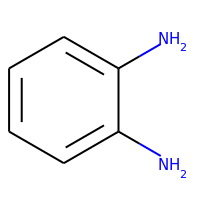
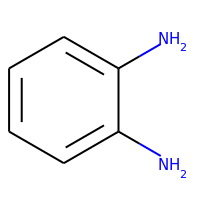
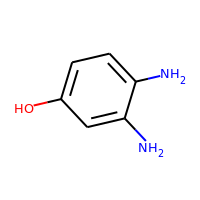
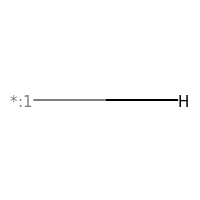
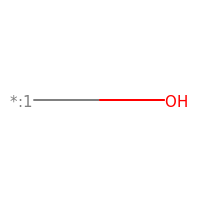
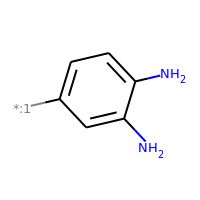
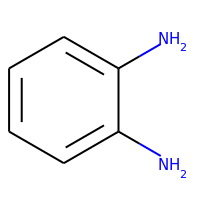
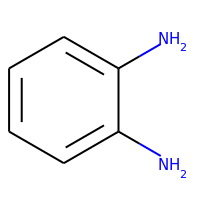
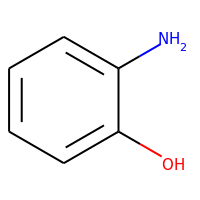
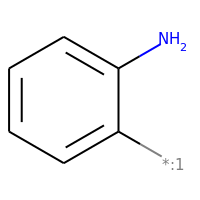
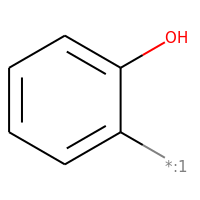
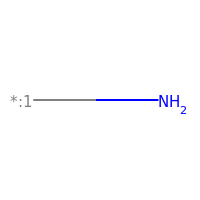
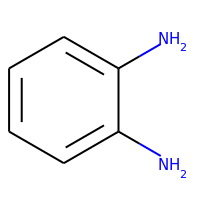
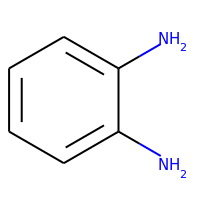
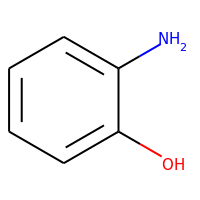
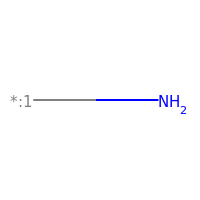
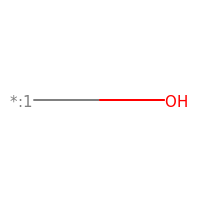
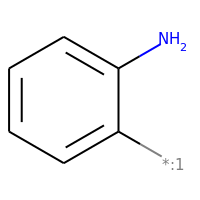
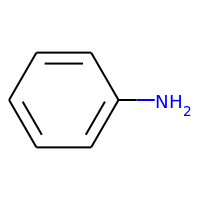
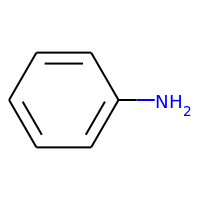
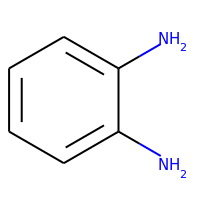
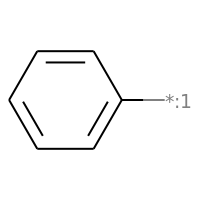
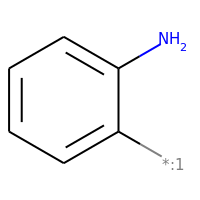
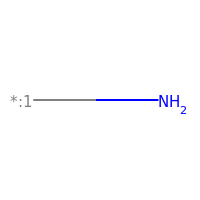
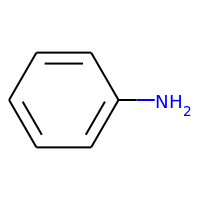
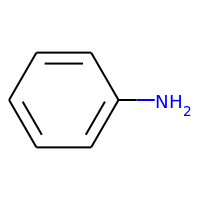
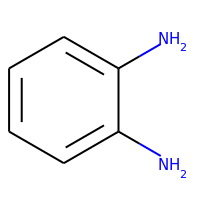
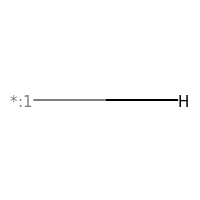
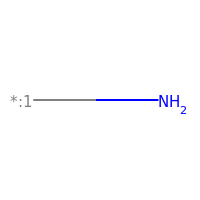
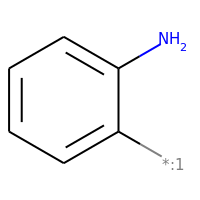
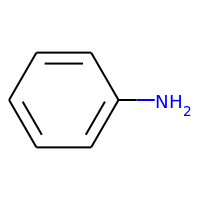
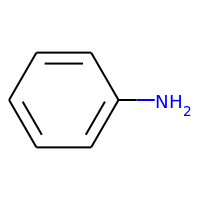
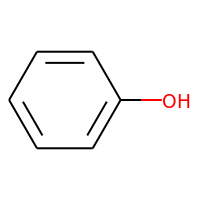
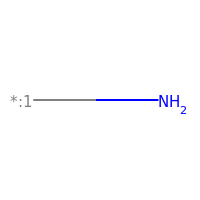
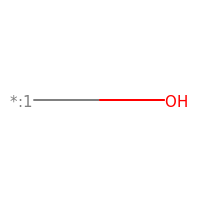
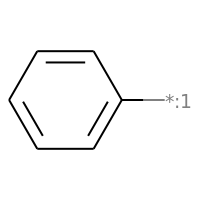
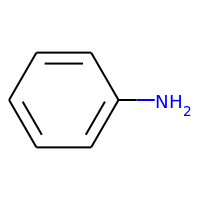
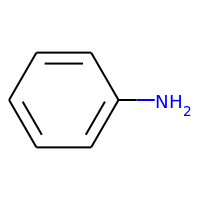
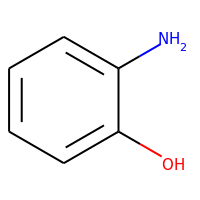
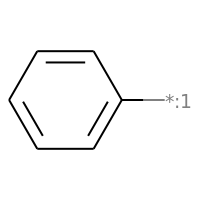
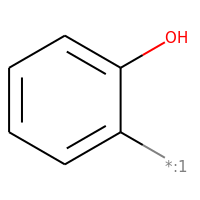
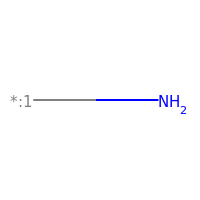
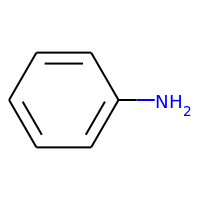
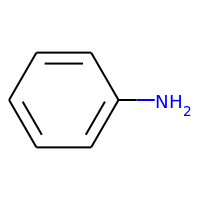
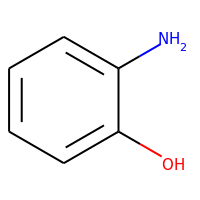
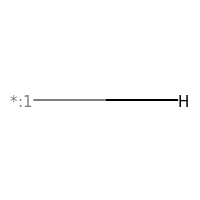
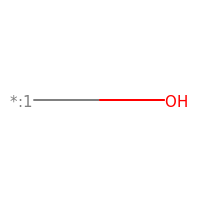
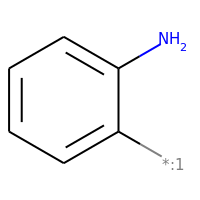
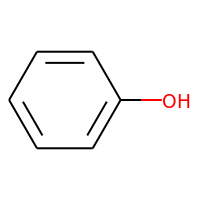
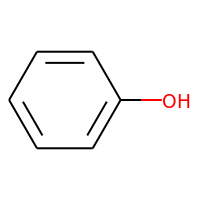
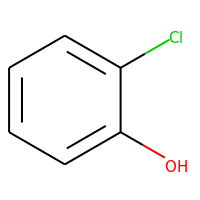
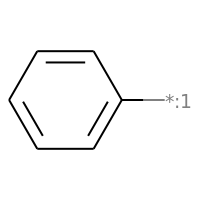
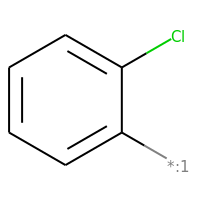
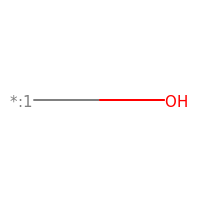
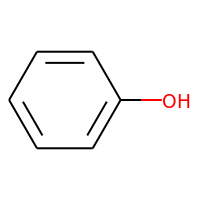
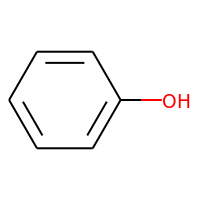
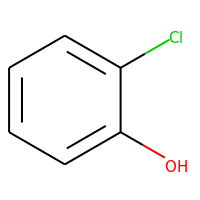
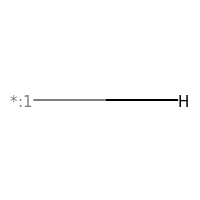
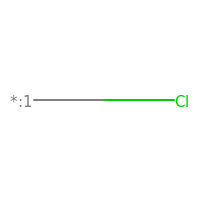
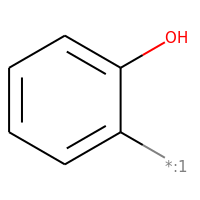
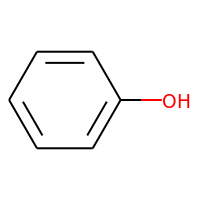
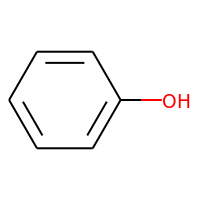
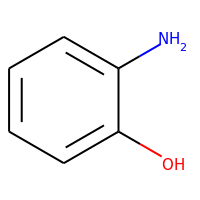
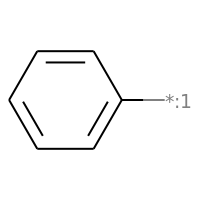
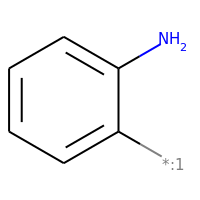
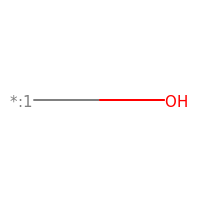
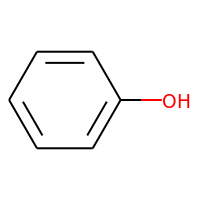
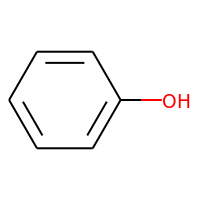
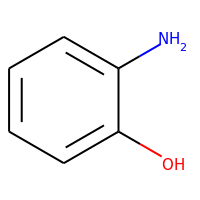
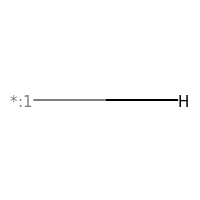
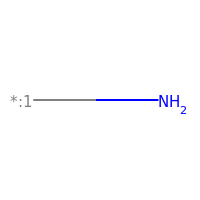
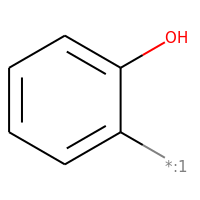
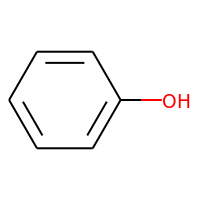
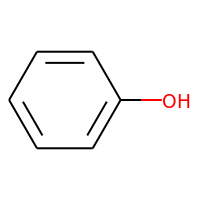
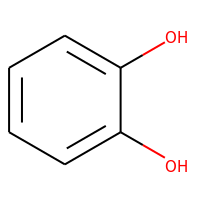
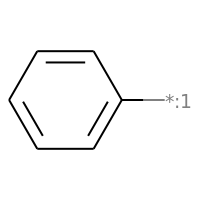
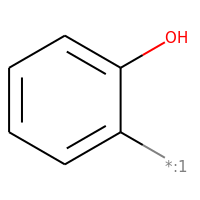
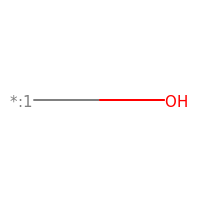
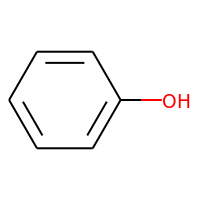
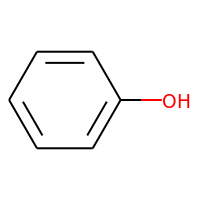
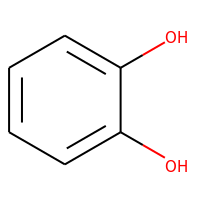
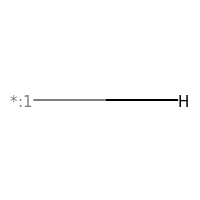
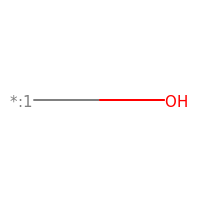
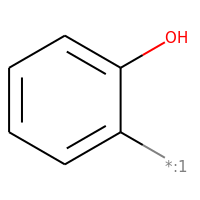
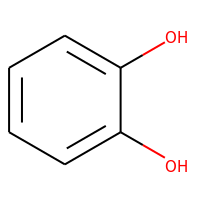
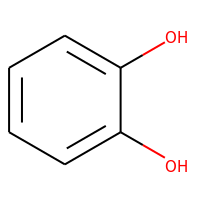
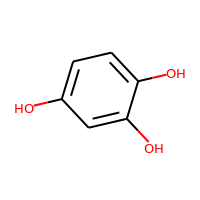
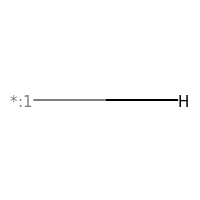
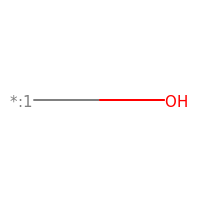
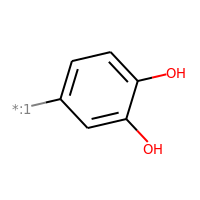
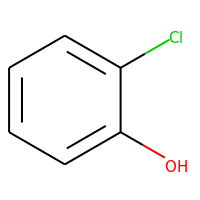
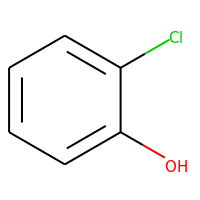
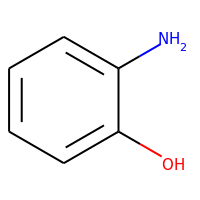
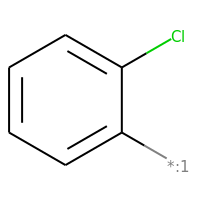
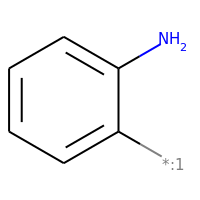
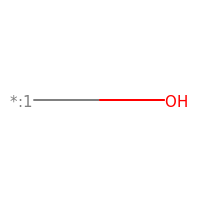
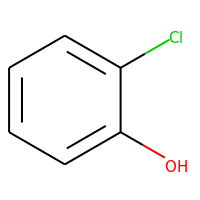
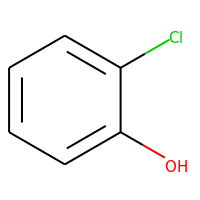
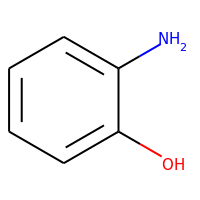
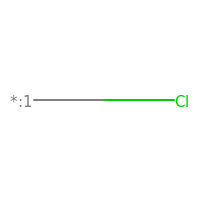
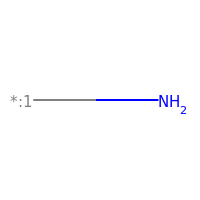
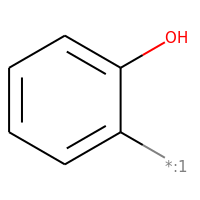
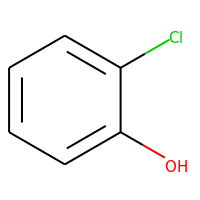
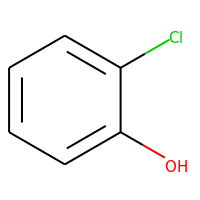
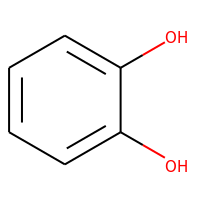
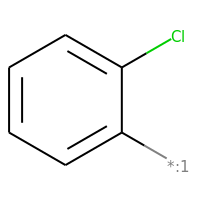
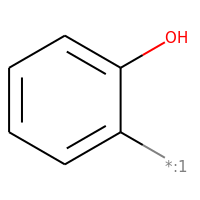
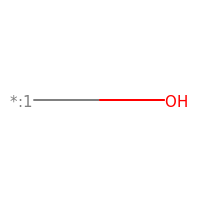
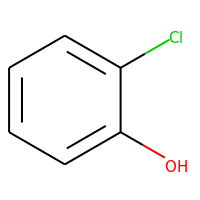
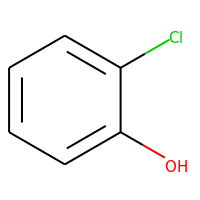
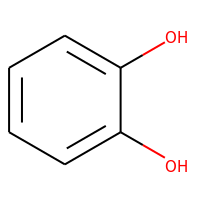
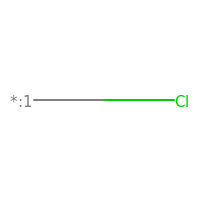
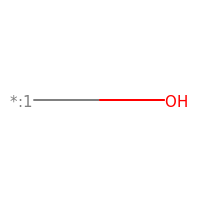
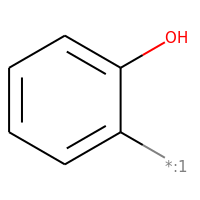

In [9]:
dfmerged

In [12]:
dfmols.to_csv('/home/oriol/dev/mmpdb/tests2/test_data.mols.csv')
dftrans.to_csv('/home/oriol/dev/mmpdb/tests2/test_data.trans.csv')
dfmerged.to_csv('/home/oriol/dev/mmpdb/tests2/test_data.merged.csv')